<a href="https://colab.research.google.com/github/jihyoung-lee/Leaves/blob/main/Leaves_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import zipfile

#local_zip = 'data.zip'

#zip_ref = zipfile.ZipFile(local_zip, 'r')

#zip_ref.extractall('/tmp')
#zip_ref.close()

# 기본경로
base_dir = '/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# 훈련에 사용되는  이미지 경로 예시
train_apple_dir = os.path.join(train_dir, 'Apple___healthy')
train_black_dir = os.path.join(train_dir, 'Apple___Black_rot')
print(train_apple_dir)
print(train_black_dir)

# 테스트에 사용되는 이미지 경로 예시
validation_apple_dir = os.path.join(validation_dir, 'Apple___healthy')
validation_black_dir = os.path.join(validation_dir, 'Apple___Black_ro')
print(validation_apple_dir)
print(validation_black_dir)

/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)\train\Apple___healthy
/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)\train\Apple___Black_rot
/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)\valid\Apple___healthy
/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)\valid\Apple___Black_ro


In [15]:
#각각 다섯 개씩 출력
train_apple_fnames = os.listdir( train_apple_dir )
train_black_fnames = os.listdir( train_black_dir )

print(train_apple_fnames[:5])
print(train_black_fnames[:5])

['0055dd26-23a7-4415-ac61-e0b44ebfaf80___RS_HL 5672.JPG', '00907d8b-6ae6-4306-bfd7-d54471981a86___RS_HL 5709.JPG', '00907d8b-6ae6-4306-bfd7-d54471981a86___RS_HL 5709_flipTB.JPG', '0098dbd9-286a-4d6a-bf4b-5459d66f88c0___RS_HL 5776.JPG', '00a6039c-e425-4f7d-81b1-d6b0e668517e___RS_HL 7669.JPG']
['0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG', '0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727_270deg.JPG', '0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727_90deg.JPG', '0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727_new30degFlipLR.JPG', '00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG']


In [8]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_apple_pix = [os.path.join(train_apple_dir, fname)
                for fname in train_apple_fnames[ pic_index-8:pic_index]]

next_black_pix = [os.path.join(train_black_dir, fname)
                for fname in train_black_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_apple_pix+next_black_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

NameError: name 'train_apple_fnames' is not defined

<Figure size 864x864 with 0 Axes>

In [4]:
from keras.preprocessing.image import ImageDataGenerator
#이미지 전처리

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, 
                                  zoom_range=0.2, width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_set = train_datagen.flow_from_directory(base_dir+'/train', target_size=(224, 224),
                                             batch_size = 32, class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(base_dir+'/valid', target_size=(224,224),
                                             batch_size=32, class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [6]:
class_dict = train_set.class_indices
print(class_dict)
li = list(class_dict.keys())
print(li)
print(len(li))


{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [8]:
import tensorflow as tf
from tensorflow import keras

base_model = keras.applications.VGG16(weights='imagenet', input_shape=(224,224,3), include_top=False)
base_model.summary()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d6bbae143d832006294945121d1f1fc so we will re-download the data.
58900480/58889256 [==============================] - 94s 2us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856   

In [9]:
base_model.trainable = False
inputs = keras.Input(shape=(224,224,3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(38)(x)

vgg16_model = keras.Model(inputs, outputs, name='pretrained_vgg16')
vgg16_model.summary()

Model: "pretrained_vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 38)                19494     
Total params: 14,734,182
Trainable params: 19,494
Non-trainable params: 14,714,688
_________________________________________________________________


In [17]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras

vgg16_model.compile(optimizer=Adam(),
            loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=[keras.metrics.CategoricalAccuracy()])

In [18]:

vgg16_history = vgg16_model.fit(train_set, steps_per_epoch=150, validation_data=valid_set,
                               epochs=25, validation_steps=100)

Epoch 1/25
150/150 [==============================] - 282s 2s/step - loss: 3.0321 - categorical_accuracy: 0.2921 - val_loss: 2.7250 - val_categorical_accuracy: 0.4269
Epoch 2/25
150/150 [==============================] - 299s 2s/step - loss: 2.7014 - categorical_accuracy: 0.3848 - val_loss: 2.4058 - val_categorical_accuracy: 0.5378
Epoch 3/25
150/150 [==============================] - 300s 2s/step - loss: 2.4222 - categorical_accuracy: 0.4913 - val_loss: 2.1778 - val_categorical_accuracy: 0.6000
Epoch 4/25
150/150 [==============================] - 293s 2s/step - loss: 2.2164 - categorical_accuracy: 0.5521 - val_loss: 1.9670 - val_categorical_accuracy: 0.6787
Epoch 5/25
150/150 [==============================] - 305s 2s/step - loss: 2.0439 - categorical_accuracy: 0.5867 - val_loss: 1.8051 - val_categorical_accuracy: 0.7031
Epoch 6/25
150/150 [==============================] - 302s 2s/step - loss: 1.8975 - categorical_accuracy: 0.6187 - val_loss: 1.6708 - val_categorical_accuracy: 0.711

In [19]:
vgg16_result = vgg16_model.evaluate(valid_set)
print('Val loss : ', vgg16_result[0])
print('Val accuracy : ', vgg16_result[1])

550/550 [==============================] - 857s 2s/step - loss: 0.8631 - categorical_accuracy: 0.7955
Val loss :  0.8631306886672974
Val accuracy :  0.7954700589179993


In [21]:
import seaborn as sns

plt.rc('figure', figsize=(10, 6))
sns.set(font_scale=1)

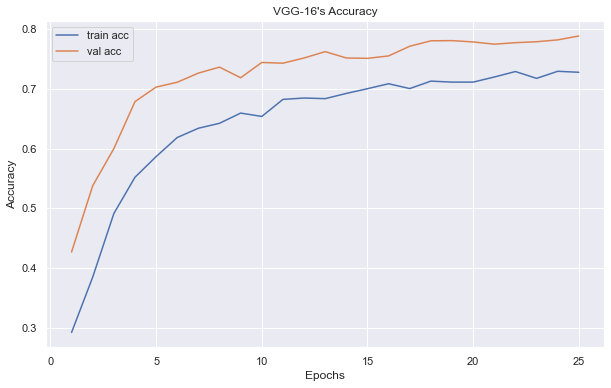

In [22]:
train_acc = vgg16_history.history['categorical_accuracy']
val_acc = vgg16_history.history['val_categorical_accuracy']

epochs_list = list(range(1, 25 + 1))

plt.plot(epochs_list, train_acc, label='train acc')
plt.plot(epochs_list, val_acc, label='val acc')
plt.title("VGG-16's Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

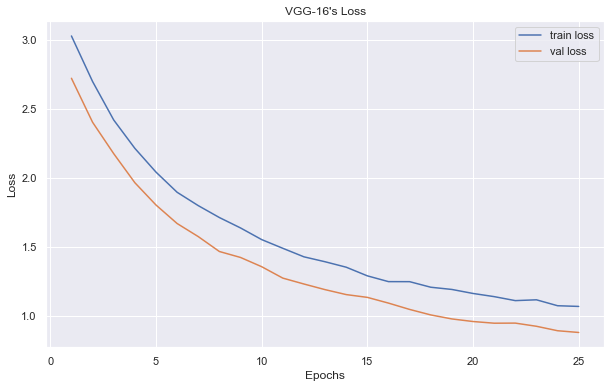

In [23]:
train_loss = vgg16_history.history['loss']
val_loss = vgg16_history.history['val_loss']

plt.plot(epochs_list, train_loss, label='train loss')
plt.plot(epochs_list, val_loss, label='val loss')
plt.title("VGG-16's Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

In [25]:
vgg16_model.save('vgg16.h5')

Mobile net

In [24]:
import tensorflow as tf
from tensorflow import keras
base_model = keras.applications.MobileNet(weights='imagenet', input_shape=(224,224,3),
                                         include_top=False)

In [25]:
base_model.trainable = False

inputs = keras.Input(shape=(224,224,3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(38)(x)

mobilenet_model = keras.Model(inputs, outputs, name='pretrained_mobilenet')
mobilenet_model.summary()

Model: "pretrained_mobilenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 38)                38950     
Total params: 3,267,814
Trainable params: 38,950
Non-trainable params: 3,228,864
_________________________________________________________________


In [26]:
mobilenet_model.compile(optimizer=keras.optimizers.Adam(),
                       loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                       metrics=['accuracy'])
epochs = 20

In [27]:
mobilenet_history = mobilenet_model.fit(train_set, steps_per_epoch=150, validation_data=valid_set, epochs=epochs, validation_steps=100)

Epoch 1/20
150/150 [==============================] - 119s 783ms/step - loss: 2.0251 - accuracy: 0.4715 - val_loss: 0.8205 - val_accuracy: 0.8044
Epoch 2/20
150/150 [==============================] - 118s 790ms/step - loss: 0.7826 - accuracy: 0.7802 - val_loss: 0.4851 - val_accuracy: 0.8672
Epoch 3/20
150/150 [==============================] - 119s 792ms/step - loss: 0.5511 - accuracy: 0.8462 - val_loss: 0.4122 - val_accuracy: 0.8769
Epoch 4/20
150/150 [==============================] - 117s 778ms/step - loss: 0.4702 - accuracy: 0.8615 - val_loss: 0.3732 - val_accuracy: 0.8869
Epoch 5/20
150/150 [==============================] - 115s 768ms/step - loss: 0.4001 - accuracy: 0.8769 - val_loss: 0.2957 - val_accuracy: 0.9078
Epoch 6/20
150/150 [==============================] - 117s 780ms/step - loss: 0.3601 - accuracy: 0.8910 - val_loss: 0.2790 - val_accuracy: 0.9162
Epoch 7/20
150/150 [==============================] - 116s 773ms/step - loss: 0.3383 - accuracy: 0.9013 - val_loss: 0.2660 -

In [30]:
results = mobilenet_model.evaluate(valid_set)
print('val loss:', results[0])
print('val acc:', results[1])

550/550 [==============================] - 172s 312ms/step - loss: 0.1787 - accuracy: 0.9430
val loss: 0.17870500683784485
val acc: 0.9429774880409241


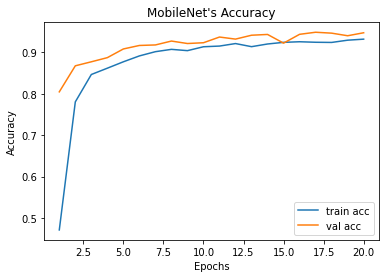

In [28]:
train_acc = mobilenet_history.history['accuracy']
val_acc = mobilenet_history.history['val_accuracy']

epochs_list = list(range(1, epochs + 1))

plt.plot(epochs_list, train_acc, label='train acc')
plt.plot(epochs_list, val_acc, label='val acc')
plt.title("MobileNet's Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

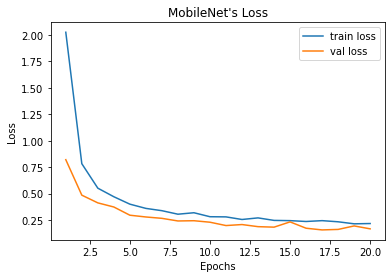

In [29]:
train_loss = mobilenet_history.history['loss']
val_loss = mobilenet_history.history['val_loss']

plt.plot(epochs_list, train_loss, label='train loss')
plt.plot(epochs_list, val_loss, label='val loss')
plt.title("MobileNet's Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

In [30]:
mobilenet_model.save('mobilenet.h5')

In [9]:
from keras.models import load_model
model = load_model('mobilenet.h5')

결과는?:
1/1 [==============================] - 0s 97ms/step
사과_붉은별무늬병


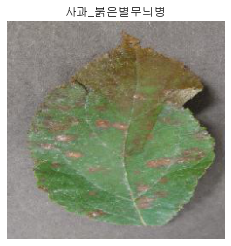

In [23]:
from keras.preprocessing import image
import numpy as np
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


image_path = "/tmp/test/test/AppleCedarRust4.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("결과는?:")

prediction = model.predict(img,verbose=1)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d): # 인덱스 추출하는 함수
    if item == j:
        class_name = li[index]
print(class_name)
        
#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()